In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
# numpy float 출력옵션 변경
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [ ]:
print(plt.style.available)
plt.style.use('ggplot')
%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# 랜덤에 의해 똑같은 결과를 재현하도록 seed값 고정
seed = 777
np.random.seed(seed)

In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_excel('시군구_변수2 (2).xlsx')
df

,시군구,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수
0,목포시,17.3,18.403979,1.528970,58.646693,117.755171,216551,3311,255,102292,47236.909550
1,여수시,29.3,20.934653,0.742100,49.157764,73.918711,274626,2038,203,143418,52223.023312
2,순천시,17.8,16.826932,0.546513,47.273704,72.343092,279225,1526,202,153944,55132.599158
3,나주시,16.8,23.296470,0.679426,50.935398,96.690926,115833,787,112,75025,64769.970561
4,광양시,25.3,14.324758,0.775685,35.648506,38.949293,151479,1175,59,93385,61648.809406
5,담양군,10.7,32.426017,0.518259,50.083836,124.120811,45923,238,57,31480,68549.528559
6,곡성군,8.3,37.925839,0.514498,58.799750,180.074235,27211,140,49,18243,67042.740068
7,구례군,7.1,36.338436,0.626733,44.192680,148.648106,24891,156,37,16530,66409.545619
8,고흥군,6.3,42.827717,0.560008,53.104181,49.885746,62142,348,31,38856,62527.759004
9,보성군,7.0,40.589750,0.731393,74.684522,77.259851,38830,284,30,26600,68503.734226


In [ ]:
print(df.keys())

Index(['시군구', '재정자립도', '노인인구비율', '기초생활수급자비율', '10만명당 약국수', '10만명당 안전상비의약품점포수',
       '총인구수', '기초생활수급자', '안전상비의약품', '자동차', '10만면당 자동차수'],
      dtype='object')


In [ ]:
df.describe()

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만명당 안전상비의약품점포수,총인구수,기초생활수급자,안전상비의약품,자동차,10만면당 자동차수
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,11.736364,30.734363,0.651772,48.901188,63.056108,82707.409091,610.545455,55.409091,49295.818182,64284.360159
std,6.225795,8.334377,0.240521,10.021058,46.255684,77715.750267,777.597198,71.690246,39679.073703,6707.545121
min,6.300000,14.324758,0.313306,23.695435,13.164130,24891.000000,119.000000,5.000000,16530.000000,47236.909550
25%,7.225000,24.487150,0.520277,43.964218,24.874895,36464.750000,205.750000,11.750000,23771.500000,61029.143144
50%,9.600000,33.375342,0.637783,48.891641,48.270522,49964.500000,313.000000,28.500000,33022.000000,66078.092735
75%,13.650000,36.484988,0.722845,52.698563,77.714807,84801.500000,523.500000,55.000000,53062.250000,68138.485687
max,29.300000,42.827717,1.528970,74.684522,180.074235,279225.000000,3311.000000,255.000000,153944.000000,74536.141150


In [ ]:
df.dtypes

시군구                  object
재정자립도               float64
노인인구비율              float64
기초생활수급자비율           float64
10만명당 약국수           float64
10만명당 안전상비의약품점포수    float64
총인구수                  int64
기초생활수급자               int64
안전상비의약품               int64
자동차                   int64
10만면당 자동차수          float64
dtype: object

In [ ]:
df.drop(["시군구", "총인구수", "기초생활수급자", "안전상비의약품", "자동차", "10만명당 안전상비의약품점포수"], axis = 1)

,재정자립도,노인인구비율,기초생활수급자비율,10만명당 약국수,10만면당 자동차수
0,17.3,18.403979,1.528970,58.646693,47236.909550
1,29.3,20.934653,0.742100,49.157764,52223.023312
2,17.8,16.826932,0.546513,47.273704,55132.599158
3,16.8,23.296470,0.679426,50.935398,64769.970561
4,25.3,14.324758,0.775685,35.648506,61648.809406
5,10.7,32.426017,0.518259,50.083836,68549.528559
6,8.3,37.925839,0.514498,58.799750,67042.740068
7,7.1,36.338436,0.626733,44.192680,66409.545619
8,6.3,42.827717,0.560008,53.104181,62527.759004
9,7.0,40.589750,0.731393,74.684522,68503.734226


In [ ]:
train_data = df.drop(["시군구", "총인구수", "기초생활수급자", "기초생활수급자비율", "안전상비의약품", "자동차", "10만명당 안전상비의약품점포수"], axis = 1)
train_data

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수
0,17.3,18.403979,58.646693,47236.909550
1,29.3,20.934653,49.157764,52223.023312
2,17.8,16.826932,47.273704,55132.599158
3,16.8,23.296470,50.935398,64769.970561
4,25.3,14.324758,35.648506,61648.809406
5,10.7,32.426017,50.083836,68549.528559
6,8.3,37.925839,58.799750,67042.740068
7,7.1,36.338436,44.192680,66409.545619
8,6.3,42.827717,53.104181,62527.759004
9,7.0,40.589750,74.684522,68503.734226


In [ ]:
corr = train_data.corr()

In [ ]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [ ]:
from matplotlib import font_manager, rc

import matplotlib

font_location='c:/Windows/fonts/malgun.ttf'

font_name=font_manager.FontProperties(fname=font_location).get_name()

matplotlib.rc('font',family=font_name)

In [ ]:
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\82104\AppData\Local\Temp\ipykernel_23976\519181320.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


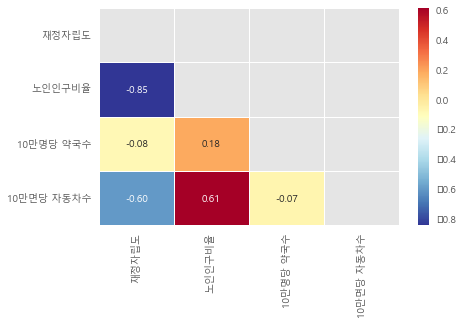

In [ ]:
sns.heatmap(data = corr, 
           annot = True,
           mask=mask,
           fmt='.2f',
           linewidths=1,
           cmap='RdYlBu_r')
plt.show()

<AxesSubplot:>

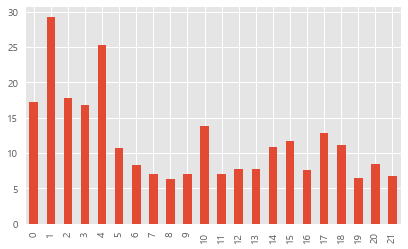

In [ ]:
%matplotlib inline
df['재정자립도'].plot(kind='bar')

<AxesSubplot:>

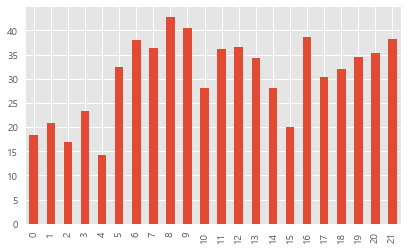

In [ ]:
%matplotlib inline
df['노인인구비율'].plot(kind='bar')

In [ ]:
# %matplotlib inline
# df['기초생활수급자비율'].plot(kind='bar')

<AxesSubplot:>

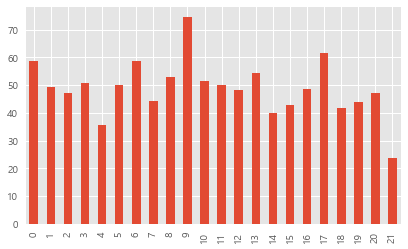

In [ ]:
%matplotlib inline
df['10만명당 약국수'].plot(kind='bar')

<AxesSubplot:>

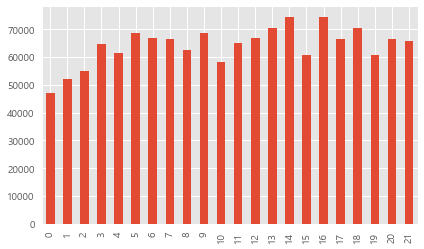

In [ ]:
%matplotlib inline
df['10만면당 자동차수'].plot(kind='bar')

In [ ]:
print(train_data.keys())


Index(['재정자립도', '노인인구비율', '10만명당 약국수', '10만면당 자동차수'], dtype='object')


In [ ]:
train_data.head()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수
0,17.3,18.403979,58.646693,47236.909550
1,29.3,20.934653,49.157764,52223.023312
2,17.8,16.826932,47.273704,55132.599158
3,16.8,23.296470,50.935398,64769.970561
4,25.3,14.324758,35.648506,61648.809406


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# minMaxScaler = MinMaxScaler()
# %time print(minMaxScaler.fit(train_data))
# train_data_minMaxScaled =  pd.DataFrame(minMaxScaler.transform(train_data), columns= train_data.keys())

# from sklearn.preprocessing import MaxAbsScaler
# maxAbsScaler = MaxAbsScaler()
# %time print(maxAbsScaler.fit(train_data))
# train_data_maxAbsScaled = pd.DataFrame(maxAbsScaler.transform(train_data), columns=train_data.keys())

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
%time print(standardScaler.fit(train_data))
train_data_standardScaled = pd.DataFrame(standardScaler.transform(train_data), columns=train_data.keys())

# from sklearn.preprocessing import RobustScaler
# robustScaler = RobustScaler()
# %time print(robustScaler.fit(train_data))
# train_data_robustScaled = pd.DataFrame(robustScaler.transform(train_data), columns=train_data.keys())


StandardScaler()
CPU times: total: 0 ns
Wall time: 7.4 ms


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


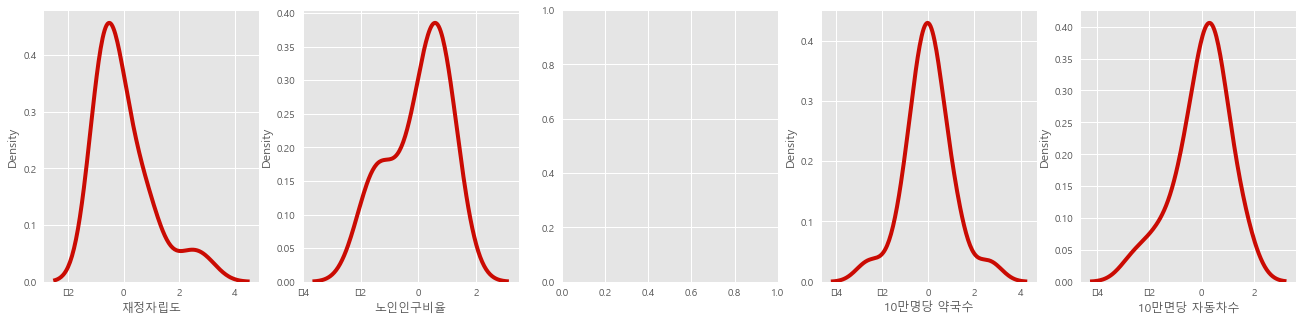

In [ ]:
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize =(20, 5))
# sns.kdeplot(train_data_minMaxScaled['재정자립도'], ax = ax1, color ='r')
# sns.kdeplot(train_data_minMaxScaled['노인인구비율'], ax = ax2, color ='r')
# sns.kdeplot(train_data_minMaxScaled['기초생활수급자비율'], ax = ax3, color ='r')
# sns.kdeplot(train_data_minMaxScaled['10만명당 약국수'], ax = ax4, color ='r')
# sns.kdeplot(train_data_minMaxScaled['10만면당 자동차수'], ax = ax5, color ='r')

# plt.show()

# fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(ncols = 5, figsize =(20, 5))
# sns.kdeplot(train_data_maxAbsScaled['재정자립도'], ax = ax1, color ='r')
# sns.kdeplot(train_data_maxAbsScaled['노인인구비율'], ax = ax2, color ='r')
# sns.kdeplot(train_data_maxAbsScaled['기초생활수급자비율'], ax = ax3, color ='r')
# sns.kdeplot(train_data_maxAbsScaled['10만명당 약국수'], ax = ax4, color ='r')
# sns.kdeplot(train_data_maxAbsScaled['10만면당 자동차수'], ax = ax5, color ='r')

# plt.show()


fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(ncols = 5, figsize =(20, 5))
sns.kdeplot(train_data_standardScaled['재정자립도'], ax = ax1, color ='r')
sns.kdeplot(train_data_standardScaled['노인인구비율'], ax = ax2, color ='r')
# sns.kdeplot(train_data_standardScaled['기초생활수급자비율'], ax = ax3, color ='r')
sns.kdeplot(train_data_standardScaled['10만명당 약국수'], ax = ax4, color ='r')
sns.kdeplot(train_data_standardScaled['10만면당 자동차수'], ax = ax5, color ='r')

plt.show()

# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols = 5, figsize =(20, 5))
# sns.kdeplot(train_data_robustScaled['재정자립도'], ax = ax1, color ='r')
# sns.kdeplot(train_data_robustScaled['노인인구비율'], ax = ax2, color ='r')
# sns.kdeplot(train_data_robustScaled['기초생활수급자비율'], ax = ax3, color ='r')
# sns.kdeplot(train_data_robustScaled['10만명당 약국수'], ax = ax4, color ='r')
# sns.kdeplot(train_data_robustScaled['10만면당 자동차수'], ax = ax5, color ='r')

# plt.show()


In [ ]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

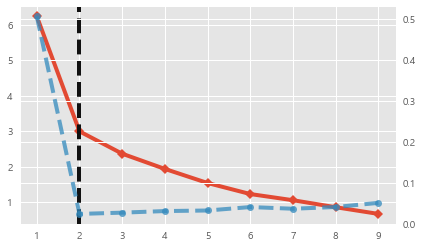

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_minMaxScaled)

C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

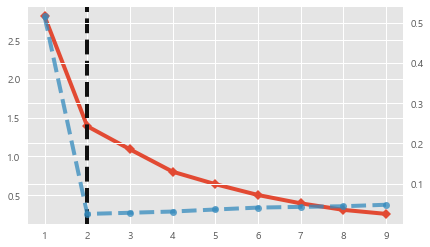

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_maxAbsScaled)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

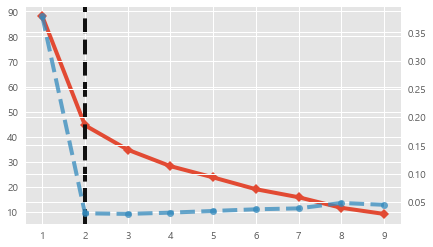

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_standardScaled)


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

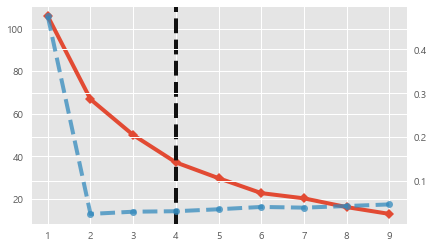

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(train_data_robustScaled)

In [ ]:
# from sklearn.decomposition import PCA
# # PCA 주성분분석
# pca = PCA(random_state=1107)
# X_p = pca.fit_transform(train_data_minMaxScaled)
# pd.Series(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# columns = []
# for i in range(len(percent_variance)):
#     columns.append(f'PC{i+1}')
    

# ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
# plt.ylabel('Percentate of Variance Explained')
# plt.xlabel('Principal Component')
# plt.title('PCA Scree Plot')
# plt.show()

In [ ]:
# # X_pp = pd.DataFrame(X_p[:,:4], columns = ['PC1','PC2','PC3', 'PC4'], index = df['시군구'])
# # X_pp

# X_pp = pd.DataFrame(X_p[:,:3], columns = ['PC1','PC2','PC3'], index = df['시군구'])
# X_pp


In [ ]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model,k=(1,10))
# visualizer.fit(X_pp)


In [ ]:
# # Minmax 군집 3개
# from sklearn.cluster import KMeans
# k = 3
# model = KMeans(n_clusters = k, random_state = 10)
# model.fit(X_pp)
# df['cluster'] = model.fit_predict(X_pp)

In [ ]:
# df

In [ ]:
# df[['시군구','cluster']].sort_values('cluster')

In [ ]:
from sklearn.decomposition import PCA
# PCA 주성분분석
pca = PCA(random_state=1107)
X_p = pca.fit_transform(train_data_standardScaled)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.598691
1    0.857815
2    0.963495
3    1.000000
dtype: float64

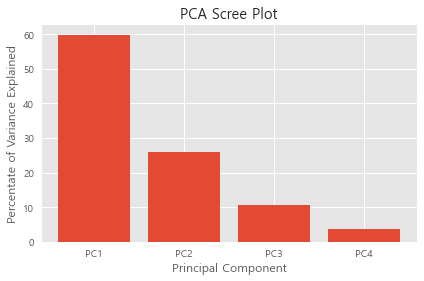

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
# X_pp = pd.DataFrame(X_p[:,:4], columns = ['PC1','PC2','PC3', 'PC4'], index = df['시군구'])
# X_pp

X_pp = pd.DataFrame(X_p[:,:2], columns = ['PC1','PC2'], index = df['시군구'])
X_pp


,PC1,PC2
시군구,,
목포시,2.722378,1.517227
여수시,3.406324,0.431924
순천시,2.367812,0.061426
나주시,0.991166,0.098413
광양시,2.881234,-1.362572
담양군,-0.576672,-0.041307
곡성군,-1.181715,0.935252
구례군,-0.995536,-0.488689
고흥군,-1.330100,0.618963


C:\Users\82104\anaconda3\envs\ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

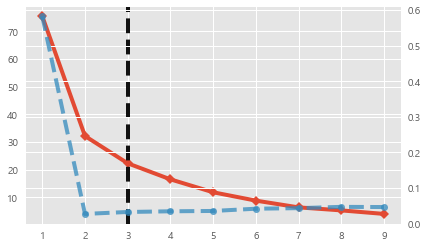

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(X_pp)

In [ ]:
# standard 군집 3개
from sklearn.cluster import KMeans
k = 3
model = KMeans(n_clusters = k, random_state = 10)
model.fit(X_pp)
train_data_standardScaled['cluster'] = model.fit_predict(X_pp)

In [ ]:
train_data_standardScaled['시군구'] = df['시군구']

In [ ]:
train_data_standardScaled.set_index('시군구')

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수,cluster
시군구,,,,,
목포시,0.914673,-1.514277,0.995388,-2.601342,0
여수시,2.887496,-1.203488,0.026206,-1.840490,0
순천시,0.996873,-1.707951,-0.166228,-1.396506,0
나주시,0.832472,-0.913437,0.207771,0.074101,0
광양시,2.229888,-2.015240,-1.353605,-0.402170,0
담양군,-0.170380,0.207750,0.120794,0.650840,1
곡성군,-0.564945,0.883175,1.011021,0.420913,2
구례군,-0.762227,0.688228,-0.480918,0.324291,1
고흥군,-0.893749,1.485167,0.429286,-0.268047,2


In [ ]:
train_data_standardScaled[['시군구','cluster']].sort_values('cluster')

,시군구,cluster
0,목포시,0
15,무안군,0
4,광양시,0
10,화순군,0
2,순천시,0
1,여수시,0
3,나주시,0
19,완도군,1
18,장성군,1
16,함평군,1


In [ ]:
train_data_standardScaled.groupby('cluster').count()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수,시군구
cluster,,,,,
0,7,7,7,7,7
1,10,10,10,10,10
2,5,5,5,5,5


In [ ]:
train_data_standardScaled.groupby('cluster').describe()

재정자립도                                                              \
        count      mean       std       min       25%       50%       75%   
cluster                                                                     
0         7.0  1.173018  1.026984 -0.005978  0.594089  0.914673  1.613381   
1        10.0 -0.550149  0.300401 -0.860868 -0.774557 -0.663586 -0.260801   
2         5.0 -0.541929  0.428014 -0.893749 -0.778667 -0.663586 -0.564945   

                  노인인구비율            ... 10만명당 약국수           10만면당 자동차수  \
              max  count      mean  ...       75%       max      count   
cluster                             ...                                  
0        2.887496    7.0 -1.285672  ...  0.235670  0.995388        7.0   
1       -0.088179   10.0  0.503139  ... -0.042017  0.120794       10.0   
2        0.191304    5.0  0.793662  ...  1.281093  2.633463        5.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0       -1.091774  0.920412 -2.601342 -1.618498 -0.919099 -0.479540  0.074101  
1        0.557231  0.648974 -0.528246  0.253279  0.362428  0.871095  1.564363  
2        0.414022  0.452940 -0.268047  0.317818  0.420913  0.643852  0.955573  

[3 rows x 32 columns]

In [ ]:
train_data_standardScaled.groupby('cluster').mean()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수
cluster,,,,
0,1.173018,-1.285672,-0.091799,-1.091774
1,-0.550149,0.503139,-0.526289,0.557231
2,-0.541929,0.793662,1.181096,0.414022


In [ ]:
train_data_standardScaled.groupby('cluster').std()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수
cluster,,,,
0,1.026984,0.551843,0.739830,0.920412
1,0.300401,0.397633,0.802854,0.648974
2,0.428014,0.611995,0.881904,0.452940


In [ ]:
train_data_standardScaled.groupby('cluster').min()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수,시군구
cluster,,,,,
0,-0.005978,-2.015240,-1.353605,-2.601342,광양시
1,-0.860868,-0.328534,-2.574470,-0.528246,강진군
2,-0.893749,-0.051278,0.429286,-0.268047,고흥군


In [ ]:
train_data_standardScaled.groupby('cluster').median()

,재정자립도,노인인구비율,10만명당 약국수,10만면당 자동차수
cluster,,,,
0,0.914673,-1.317759,0.026206,-0.919099
1,-0.663586,0.618365,-0.325791,0.362428
2,-0.663586,0.883175,1.011021,0.420913


cluster
0     7
1    10
2     5
Name: 재정자립도, dtype: int64


<AxesSubplot:xlabel='cluster'>

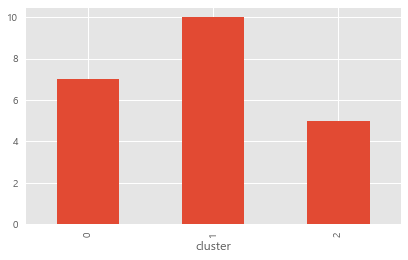

In [ ]:
cluster_size = train_data_standardScaled.groupby(['cluster'])['재정자립도'].count()
print(cluster_size)
cluster_size.plot(kind = 'bar')

cluster
0     7
1    10
2     5
Name: 노인인구비율, dtype: int64


<AxesSubplot:xlabel='cluster'>

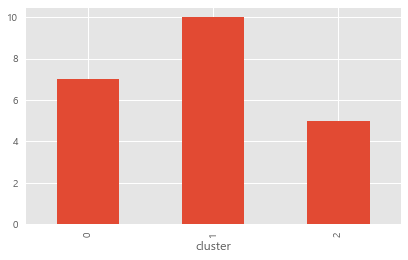

In [ ]:
cluster_size = train_data_standardScaled.groupby(['cluster'])['노인인구비율'].count()
print(cluster_size)
cluster_size.plot(kind = 'bar')

In [ ]:
temp = train_data_standardScaled.groupby(['cluster']).median()
cluster_median = temp.transpose()
median_table = cluster_median

In [ ]:
median_table

cluster,0,1,2
재정자립도,0.914673,-0.663586,-0.663586
노인인구비율,-1.317759,0.618365,0.883175
10만명당 약국수,0.026206,-0.325791,1.011021
10만면당 자동차수,-0.919099,0.362428,0.420913


In [ ]:
temp = train_data_standardScaled.groupby(['cluster']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean

In [ ]:
mean_table

cluster,0,1,2
재정자립도,1.173018,-0.550149,-0.541929
노인인구비율,-1.285672,0.503139,0.793662
10만명당 약국수,-0.091799,-0.526289,1.181096
10만면당 자동차수,-1.091774,0.557231,0.414022


In [ ]:
# figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
# figure.set_size_inches(30, 10)

# sns.barplot(data = df, y = 'cluster', x = '컬럼1', orie )

SyntaxError: positional argument follows keyword argument (399718157.py, line 4)

In [ ]:
# plt.figure(figsize =  (20, 25))
# annot_kws = {'fontsize' : 12}
# sns.heatmap(median_table, 
#            annot = True, 
#            fmt = '.3f', 
#            linewidths = 0.1,
#            annot_kws = annot_kws, 
#            cmap = 'RdYIBu_r')
# plt.title('클러스터 X 변수 medain table', fontsize = 13)
# plt.show()

In [ ]:
train_data_standardScaled[['시군구','cluster']].sort_values('cluster')